In [1]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve,convolve2d
import math

Q1)
--> SSD or Normalized Correlation:
Capture a 10 sec video footage using the camera. The footage should be taken with the camera in hand
and you need to pan the camera slightly from left-right or right-left during the 10 sec duration. Pick any
image frame from the 10 sec video footage. Pick a region of interest corresponding to an object in the
image. Crop this region from the image. Then use this cropped region to compare with randomly picked
10 images in the dataset of 10 sec video frames, to see if there is a match for the object in the scenes from
the 10 images. For comparison use sum of squared differences (SSD) or normalized correlation.

In [2]:
vidcap = cv2.VideoCapture(r'C:\Users\gppre\Desktop\CV_Assignment\Video.mp4')
success,image = vidcap.read()
count = 0
while success:
    success,image = vidcap.read()
    if count%30==0 :
        image=cv2.flip(image,0)
        image=cv2.flip(image,0)
        cv2.imwrite(r'C:\Users\gppre\Desktop\CV_Assignment\Imgs\frame%d.jpg' % count, image)      
        print('Read a new frame: ', success)
    count += 1

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True


In [3]:
def ssd(A,B):
    squares = (A[:,:,:3] - B[:,:,:3]) ** 2
    return math.sqrt(np.sum(squares))

In [4]:
def norm_data(data):
    mean_data=np.mean(data)
    std_data=np.std(data, ddof=1)
    return (data-mean_data)/(std_data)


def ncc(data0, data1):
    return (1.0/(data0.size-1)) * np.sum(norm_data(data0)*norm_data(data1))

In [5]:
import cv2

imdir = r'Imgs/'
ext = ['png', 'jpg', 'gif']   

files = []
files.extend(glob.glob(imdir + '*.' + 'jpg'))

images = [cv2.imread(file) for file in files]
print(files)

['Imgs\\frame0.jpg', 'Imgs\\frame120.jpg', 'Imgs\\frame150.jpg', 'Imgs\\frame180.jpg', 'Imgs\\frame210.jpg', 'Imgs\\frame240.jpg', 'Imgs\\frame270.jpg', 'Imgs\\frame30.jpg', 'Imgs\\frame300.jpg', 'Imgs\\frame330.jpg', 'Imgs\\frame60.jpg', 'Imgs\\frame90.jpg']


(640, 352, 3)


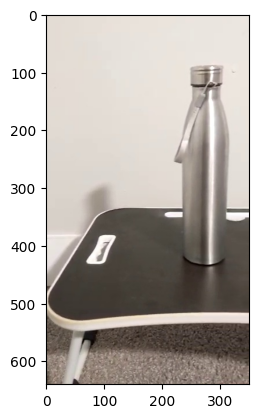

In [6]:
plt.imshow(cv2.cvtColor(images[2], cv2.COLOR_BGR2RGB))
print(images[0].shape)

True

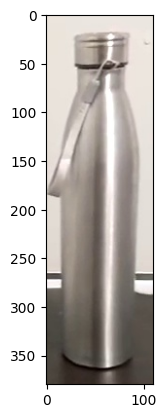

In [7]:
cropped_image = images[2][70:450,220:330]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

cv2.imwrite("Cropped Image.jpg", cropped_image)

In [8]:
d=dict()
d_norm=dict()
for i in range(0,260,20):
    for j in range(0,242,20):
        d[str(i)+":"+str(i+380),str(j)+":"+str(j+110)]=ssd(cropped_image,images[3][i:i+380,j:j+110])
        

In [9]:
a=min(d.items(), key=lambda x: x[1])
y1,y2=map(int,a[0][0].split(':'))
x1,x2=map(int,a[0][1].split(':'))

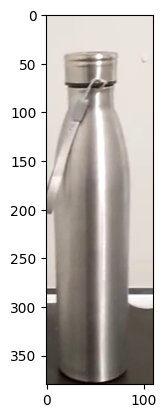

In [10]:
plt.imshow(cv2.cvtColor(images[3][y1:y2,x1:x2], cv2.COLOR_BGR2RGB))

In [11]:
color = (255, 0, 0)

thickness = 2

image = cv2.rectangle(images[3], (x1,y1), (x2,y2), color, thickness)

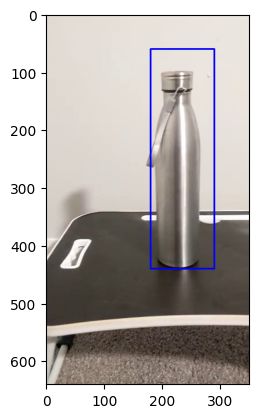

In [12]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

Q2) 
--> Motion Tracking Equations:-
Implement the motion tracking equation from fundamental principles. Select any 2 consecutive frames
from the set from problem 1 and compute the motion function estimates. Conduct image registration to
realign the frames. Repeat test for all consecutive pairs of frames in the video.

In [13]:
Iref=cv2.imread(r'C:\Users\gppre\Desktop\CV_Assignment\Imgs\frame0.jpg',cv2.IMREAD_GRAYSCALE)
Inext=cv2.imread(r'C:\Users\gppre\Desktop\CV_Assignment\Imgs\frame30.jpg',cv2.IMREAD_GRAYSCALE)
Iref=np.array(Iref).astype(np.float32)
Inext=np.array(Inext).astype(np.float32)
kernel_x = np.array([[-1., 1.], [-1., 1.]])*.25
kernel_y = np.array([[-1., -1.], [1., 1.]])*.25
kernel_t = np.array([[1., 1.], [1., 1.]])*.25
Iref = Iref / 255. 
Inext = Inext / 255.
Ix=cv2.filter2D(Iref,-1,kernel=kernel_x)
Iy=cv2.filter2D(Iref,-1,kernel=kernel_y)
It=cv2.filter2D(Iref,-1,kernel=kernel_t)+cv2.filter2D(Inext,-1,kernel=kernel_x)
Ix,Iy,It=np.array(Ix),np.array(Iy),np.array(It)

In [14]:
u=np.divide(It,np.sqrt(np.square(Ix)+np.square(Iy)))

C:\Users\gppre\AppData\Local\Temp\ipykernel_14208\3143559099.py:1: RuntimeWarning: divide by zero encountered in divide
  u=np.divide(It,np.sqrt(np.square(Ix)+np.square(Iy)))


In [15]:
u

array([[        inf,         inf,         inf, ..., 434.00003  ,
        273.53702  , 274.1695   ],
       [        inf,         inf,         inf, ..., 434.00003  ,
        273.53577  , 274.1682   ],
       [        inf,         inf,         inf, ..., 276.06686  ,
        218.00002  , 218.25002  ],
       ...,
       [ 12.442952 ,  10.291165 ,  32.76096  , ...,  26.418278 ,
         10.162134 ,  54.813053 ],
       [ 54.285725 ,  49.226086 ,  35.538933 , ...,  32.7875   ,
          8.227192 ,  28.776728 ],
       [ 67.11873  ,  66.564026 ,  31.117113 , ...,  15.661916 ,
          7.6126294,  24.531166 ]], dtype=float32)

Q2)2)

In [17]:
import cv2
import numpy as np
 
def image_registraion(align,ref):

# Open the image files.
  img1_color = align  
  img2_color = ref    
  
  # Convert to grayscale.
  img1 = cv2.cvtColor(img1_color, cv2.COLOR_BGR2GRAY)
  img2 = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY)
  height, width = img2.shape
  
  # Create ORB detector with 5000 features.
  orb_detector = cv2.ORB_create(5000)
  
  # Find keypoints and descriptors.
  kp1, d1 = orb_detector.detectAndCompute(img1, None)
  kp2, d2 = orb_detector.detectAndCompute(img2, None)
  
  # Match features between the two images.
  matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
  
  # Match the two sets of descriptors.
  matches = matcher.match(d1, d2)
  
  # Sort matches on the basis of their Hamming distance.
  matches=sorted(matches,key = lambda x: x.distance)
  
  # Take the top 90 % matches forward.
  matches = matches[:int(len(matches)*0.9)]
  no_of_matches = len(matches)
  
  # Define empty matrices of shape no_of_matches * 2.
  p1 = np.zeros((no_of_matches, 2))
  p2 = np.zeros((no_of_matches, 2))
  
  for i in range(len(matches)):
    p1[i, :] = kp1[matches[i].queryIdx].pt
    p2[i, :] = kp2[matches[i].trainIdx].pt
  
  # Find the homography matrix.
  homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC)
  
  transformed_img = cv2.warpPerspective(img1_color,
                      homography, (width, height))
  return transformed_img

In [ ]:

import cv2
import numpy as np

# Creating a VideoCapture object to read the video
cap = cv2.VideoCapture(r'C:\Users\gppre\Desktop\CV_Assignment\Video.mp4')
ret, frame = cap.read()

# Loop until the end of the video
while (cap.isOpened()):
	# Capture frame-by-frame
	prev=frame
	ret, frame = cap.read()
	disp=image_registraion(frame,prev)

	
	disp = cv2.resize(disp, (540, 380), fx = 0, fy = 0,
						interpolation = cv2.INTER_CUBIC)

	# Display the resulting frame
	cv2.imshow('Frame', disp)

	# define q as the exit button
	if cv2.waitKey(25) & 0xFF == ord('q'):
		break

# release the video capture object
cap.release()
# Closes all the windows currently opened.
cv2.destroyAllWindows()

Q3)
For the video (problem 1) you have taken, plot the optical flow vectors on each frame. (i) treating every
previous frame as a reference frame (ii) treating every 11th frame as a reference frame (iii) treating every
31st frame as a reference frame

In [19]:
import cv2 as cv
import numpy as np

# a VideoCapture object
cap = cv.VideoCapture(r"C:\Users\gppre\Desktop\CV_Assignment\Video.mp4")
ret, first_frame = cap.read()
prev_gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY)
mask = np.zeros_like(first_frame)
mask[..., 1] = 255
count=0
while(cap.isOpened() and count<30):

    ret, frame = cap.read()
    count+=1
    
    # Opens a new window and displays the input frame
    frame=cv.flip(frame,0)
    cv.imshow("input", frame)
    
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    
    # Calculates dense optical flow by Farneback method
    flow = cv.calcOpticalFlowFarneback(prev_gray, gray,None,0.5, 3, 15, 3, 5, 1.2, 0)

    # Computes the magnitude and angle of the 2D vectors
    magnitude, angle = cv.cartToPolar(flow[..., 0], flow[..., 1])

    mask[..., 0] = angle * 180 / np.pi / 2
    
    mask[..., 2] = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)
    
    rgb = cv.cvtColor(mask, cv.COLOR_HSV2BGR)
    
    cv.imshow("dense optical flow", rgb)
    
    # Updates previous frame
    prev_gray = gray
    
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

In [ ]:
optical_flow(1)

In [ ]:
optical_flow(11)

In [ ]:
optical_flow(31)

Q4) Implement a feature based object detection application (from scratch) for detecting an object of
your choice. Test it for at least 2 differently looking objects. Validate your results by testing against
built-in object detection functions/code in MATLAB/OpenCV.

In [1]:
import cv2 as cv
import math as math
import numpy as np
org=cv.imread(r'C:\Users\gppre\Desktop\CV_Assignment\Assign_3_4\Trees.jpg')
ref=cv.imread(r'C:\Users\gppre\Desktop\CV_Assignment\Assign_3_4\Trees_cropped.jpg')
org = cv.cvtColor(org, cv.COLOR_BGR2GRAY)
ref=cv.cvtColor(ref, cv.COLOR_BGR2GRAY)
print(ref.shape)
print(org.shape)

(725, 620)
(1335, 2000)


In [2]:
def sum_squ_dis(cropped,orginal):
    squares = (cropped[:,:] - orginal[:,:]) ** 2
    return math.sqrt(np.sum(squares))

In [3]:
d=dict()
d_norm=dict()
for i in range(0,610,20):
    for j in range(0,1380,20):
        d[str(i)+":"+str(i+725),str(j)+":"+str(j+620)]=sum_squ_dis(ref,org[i:i+725,j:j+620])
        #d_norm[str(i)+":"+str(i+100),str(j)+":"+str(j+100)]=ncc(norm_data(cropped_image),norm_data(images[0][i:i+100,j:j+100]))

In [4]:
a=sorted(d.items(), key=lambda x: x[1])

In [5]:
#print(d.items())
a=min(d.items(), key=lambda x: x[1])
y1,y2=map(int,a[0][0].split(':'))
x1,x2=map(int,a[0][1].split(':'))

In [6]:
color = (0, 255, 0)
thickness = 2
print(x1,y1)
image = cv.rectangle(org, (x1,y1), (x2,y2), color, thickness)
image=cv.rectangle(org, (800,120), (1240,730), color, thickness)
cv.putText(image, 'tree', (x1+30, y1+30), cv.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
cv.putText(image, 'tree', (810, 110), cv.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

1200 180


array([[ 72,  72,  72, ...,  78,  78,  78],
       [ 72,  72,  72, ...,  78,  78,  78],
       [ 72,  72,  72, ...,  78,  78,  78],
       ...,
       [ 71,  85, 107, ..., 141, 132, 135],
       [ 61,  74, 108, ..., 146, 132, 123],
       [ 52,  57,  97, ..., 155, 141, 126]], dtype=uint8)

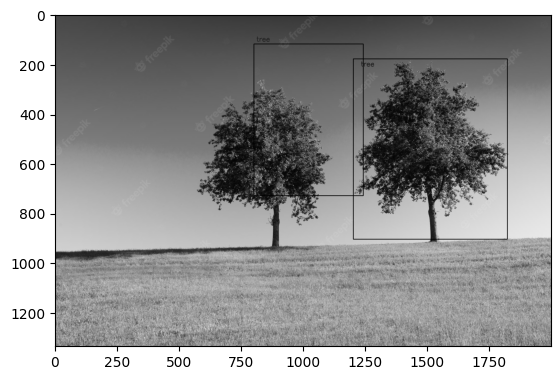

In [7]:
import matplotlib.pyplot as plt
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

Q5) 
Implement a real-time face tracking application that will detect as many faces there are with a
scene, and identify the person’s facial region (draw a bounding box) whose is sought for by the user
(you must ask for a person in your application and it should show a bounding box over the person
of interest). Validate at least 20 times and present the recognition performance metrics (accuracy,
precision, recall and Intersection over Union (IoU)).

In [ ]:
import cv2
import os
import time

import imutils
detectorPaths = {
    
    "face": r"C:\Users\gppre\Desktop\CV_Assignment\face.xml",
    "smile": r"C:\Users\gppre\Desktop\CV_Assignment\smile.xml",
}

print("[INFO] loading haar cascades...")
detectors = dict()
 
for (name, path) in detectorPaths.items():
    detectors[name] = cv2.CascadeClassifier(path)

print("[INFO] starting video stream...")
vs = cv2.VideoCapture(0)

while True:
    _,frame = vs.read()
    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faceRects = detectors["face"].detectMultiScale(
        gray, scaleFactor=1.05, minNeighbors=5, minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE)

    for (fX, fY, fW, fH) in faceRects:
        faceROI = gray[fY:fY + fH, fX:fX + fW]
        smileRects = detectors["smile"].detectMultiScale(
            faceROI, scaleFactor=1.1, minNeighbors=10,
            minSize=(15, 15), flags=cv2.CASCADE_SCALE_IMAGE)
        for (sX, sY, sW, sH) in smileRects:
            ptA = (fX + sX, fY + sY)
            ptB = (fX + sX + sW, fY + sY + sH)
            cv2.rectangle(frame, ptA, ptB, (255, 0, 0), 2)
        cv2.rectangle(frame, (fX, fY), (fX + fW, fY + fH),
                      (0, 255, 0), 2)
    cv2.imshow("Frame", frame)
    if cv2.waitKey(1) == ord("q"):
        break

cv2.destroyAllWindows()

Q6)
Fix a marker on a wall or a flat vertical surface. From a distance D, keeping the camera stationed static
(not handheld and mounted on a tripod or placed on a flat surface), capture an image such that the marker
is registered. Then translate the camera by T units along the axis parallel to the ground (horizontal) and
then capture another image, with the marker being registered. Compute D using disparity based depth
estimation in stereo-vision theory. (Note: you can pick any value for D and T. Keep in mind that T cannot
be large as the marker may get out of view. Of course this depends on D)

In [21]:

import cv2

def click_event(event, x, y, flags, params):

	# checking for left mouse clicks
	if event == cv2.EVENT_LBUTTONDOWN:

		print(x, ' ', y)

		font = cv2.FONT_HERSHEY_SIMPLEX
		cv2.putText(img, str(x) + ',' +
					str(y), (x,y), font,
					1, (255, 0, 0), 2)
		cv2.imshow('image', img)

	# checking for right mouse clicks	
	if event==cv2.EVENT_RBUTTONDOWN:

		print(x, ' ', y)

		font = cv2.FONT_HERSHEY_SIMPLEX
		b = img[y, x, 0]
		g = img[y, x, 1]
		r = img[y, x, 2]
		cv2.putText(img, str(b) + ',' +
					str(g) + ',' + str(r),
					(x,y), font, 1,
					(255, 255, 0), 2)
		cv2.imshow('image', img)


if __name__=="__main__":

	# reading the image
	img = cv2.imread(r'C:\Users\gppre\Desktop\CV_Assignment\image1.jpg', 1)

	# displaying the image
	cv2.imshow('image', img)

	cv2.setMouseCallback('image', click_event)

	# wait for a key to be pressed to exit
	cv2.waitKey(0)

	# close the window
	cv2.destroyAllWindows()

675   324


In [ ]:
ul,vl= 927 ,  358
ur,vr=662  , 368
b=152.2 # distance between left and right cameras
f=1329.30324 #focallength
z=(b*f)/(ul-ur) #distance of object
print('The distance is '+str(z)+'mm')

The distance is 763.4715212377357mm
